# 0. 安装必要的库，这里已经显示安装好

In [1]:
# !pip install NJmatML
# !pip install matplotlib
# !pip install sklearn
# !pip install scikit-learn
# !pip install pandas 
# !pip install gplearn 
# !pip install imblearn 
# !pip install numpy
# !pip install seaborn
# !pip install xgboost
# !pip install rdkit
# !pip install padelpy
# !pip install pymatgen
# !pip install matminer
from NJmatML import dataML 
import warnings
warnings.filterwarnings("ignore")

# 1. file_name打开的文件名可视化pandas数据
#### data是csv倒入时的数据集
#### data_rfe在后面会有，是rfe特征选择后的总数据集
#### t是rfe特征选择后的特征数据
#### target是rfe特征选择后的目标数据

     A1 NumberofProtons  A2 NumberofProtons  B NumberofProtons  \
0                     3                   3                 32   
1                    11                  11                 32   
2                    19                  19                 32   
3                    37                  37                 32   
4                    55                  55                 32   
..                  ...                 ...                ...   
300                  19                  19                 29   
301                  19                  19                 26   
302                  19                  19                 12   
303                  19                  19                 25   
304                  19                  19                 28   

     X1 NumberofProtons  X2 NumberofProtons  X3 NumberofProtons  \
0                     9                   9                   9   
1                     9                   9                   9   
2     

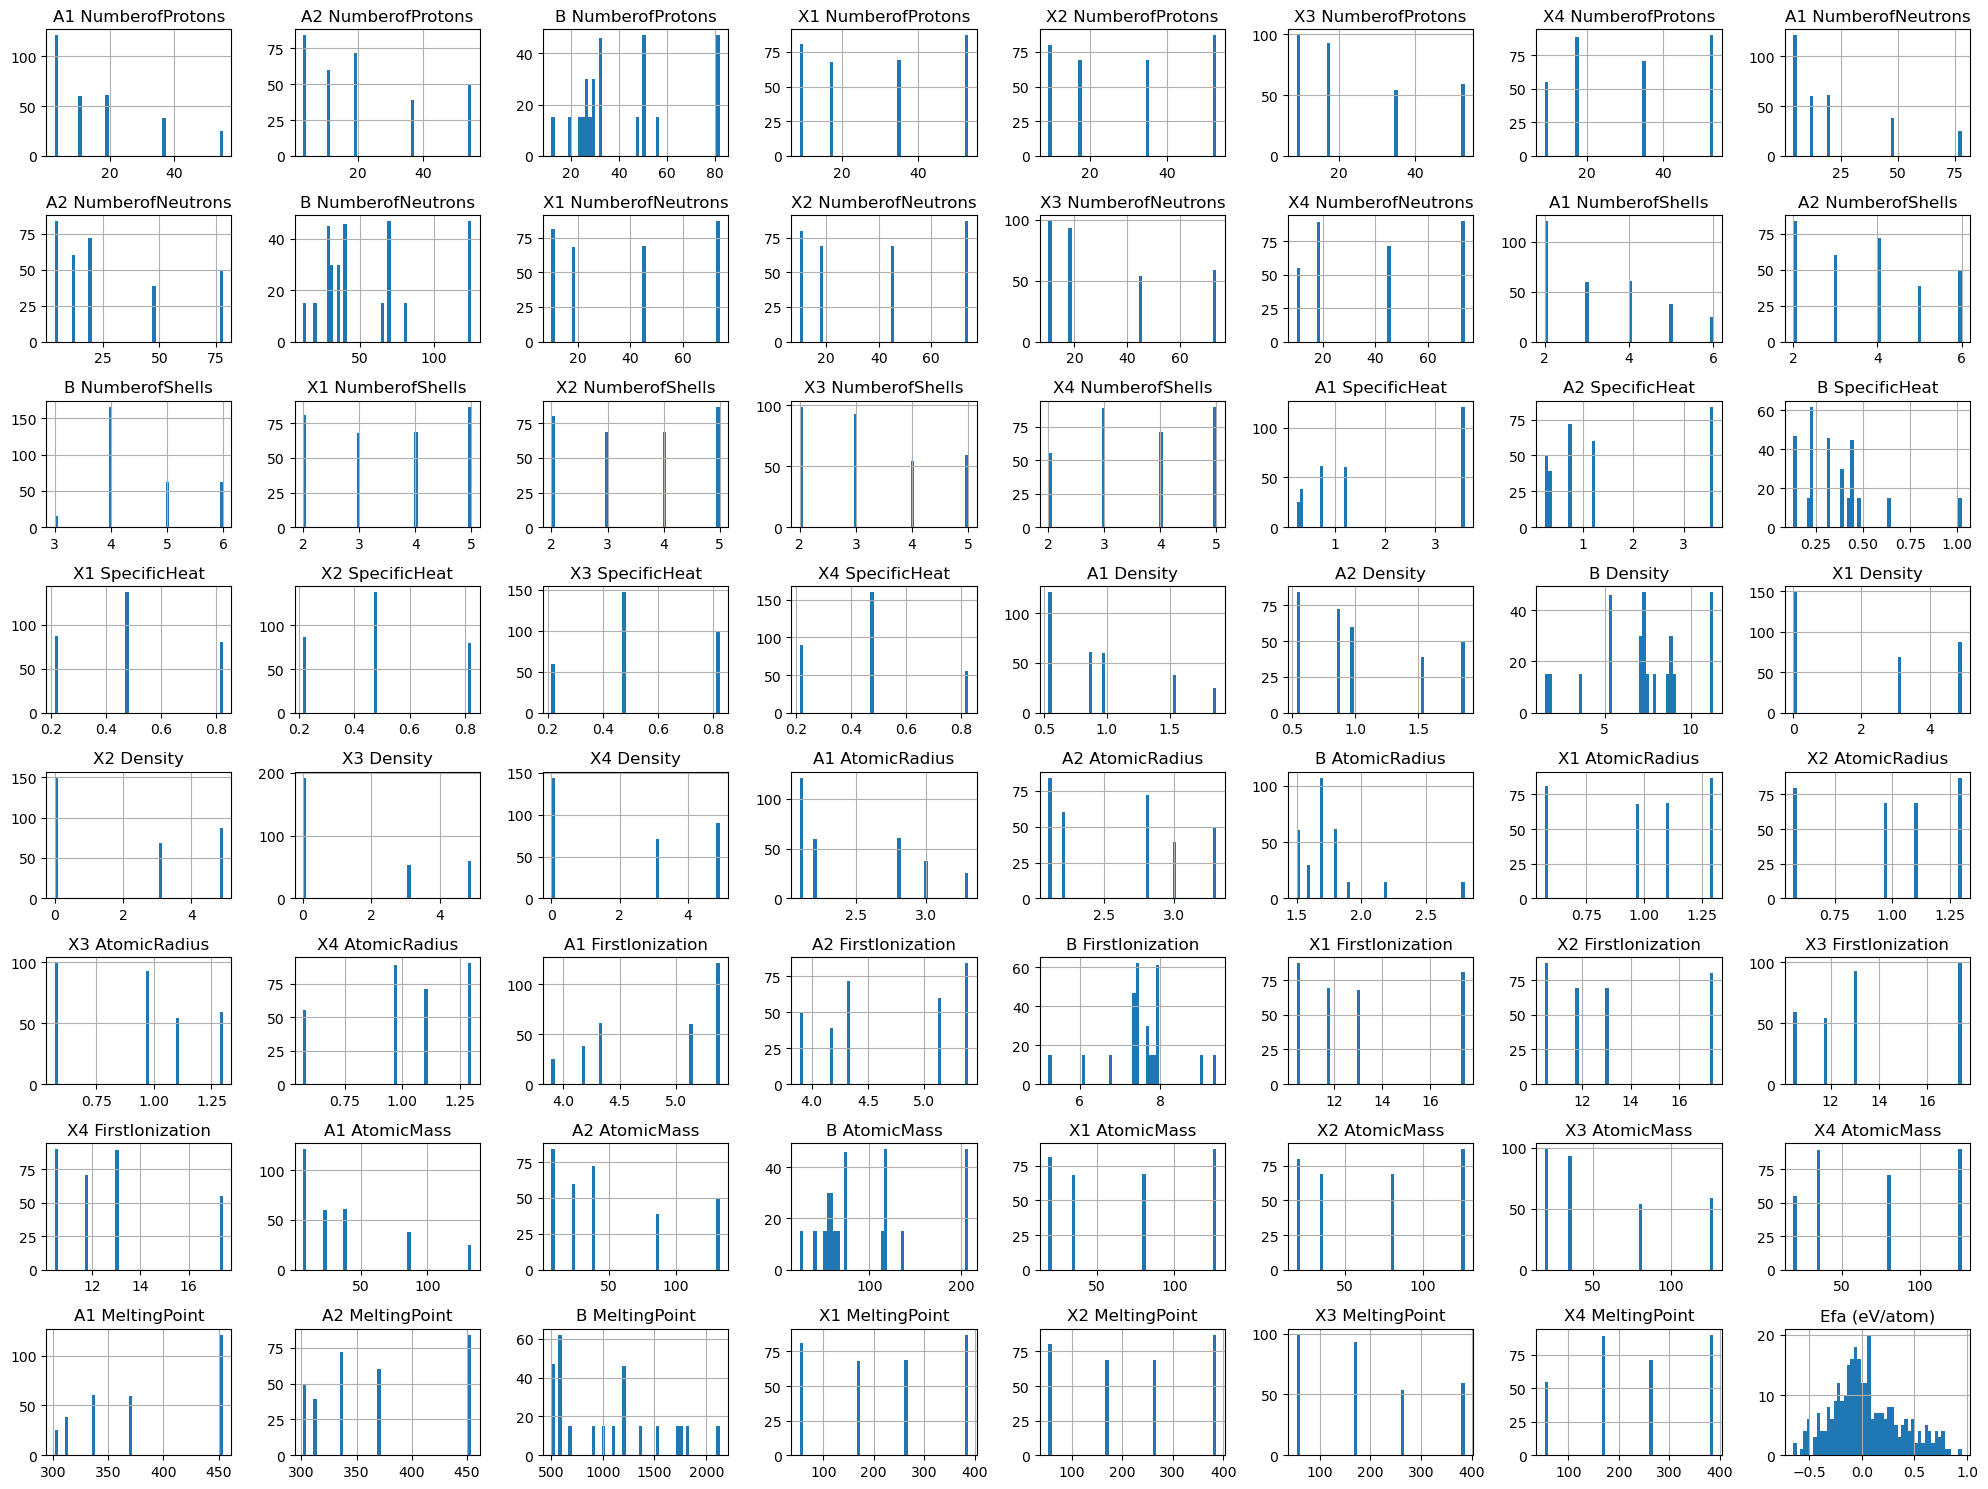

In [2]:
dataML.file_name('2DEformationCleaned.csv') #打开csv并存到data中
dataML.hist()  #画所有列分布的柱状图，例如potential 在0.3 V最多

# 2. 封装函数特征选择之前heatmap画热图

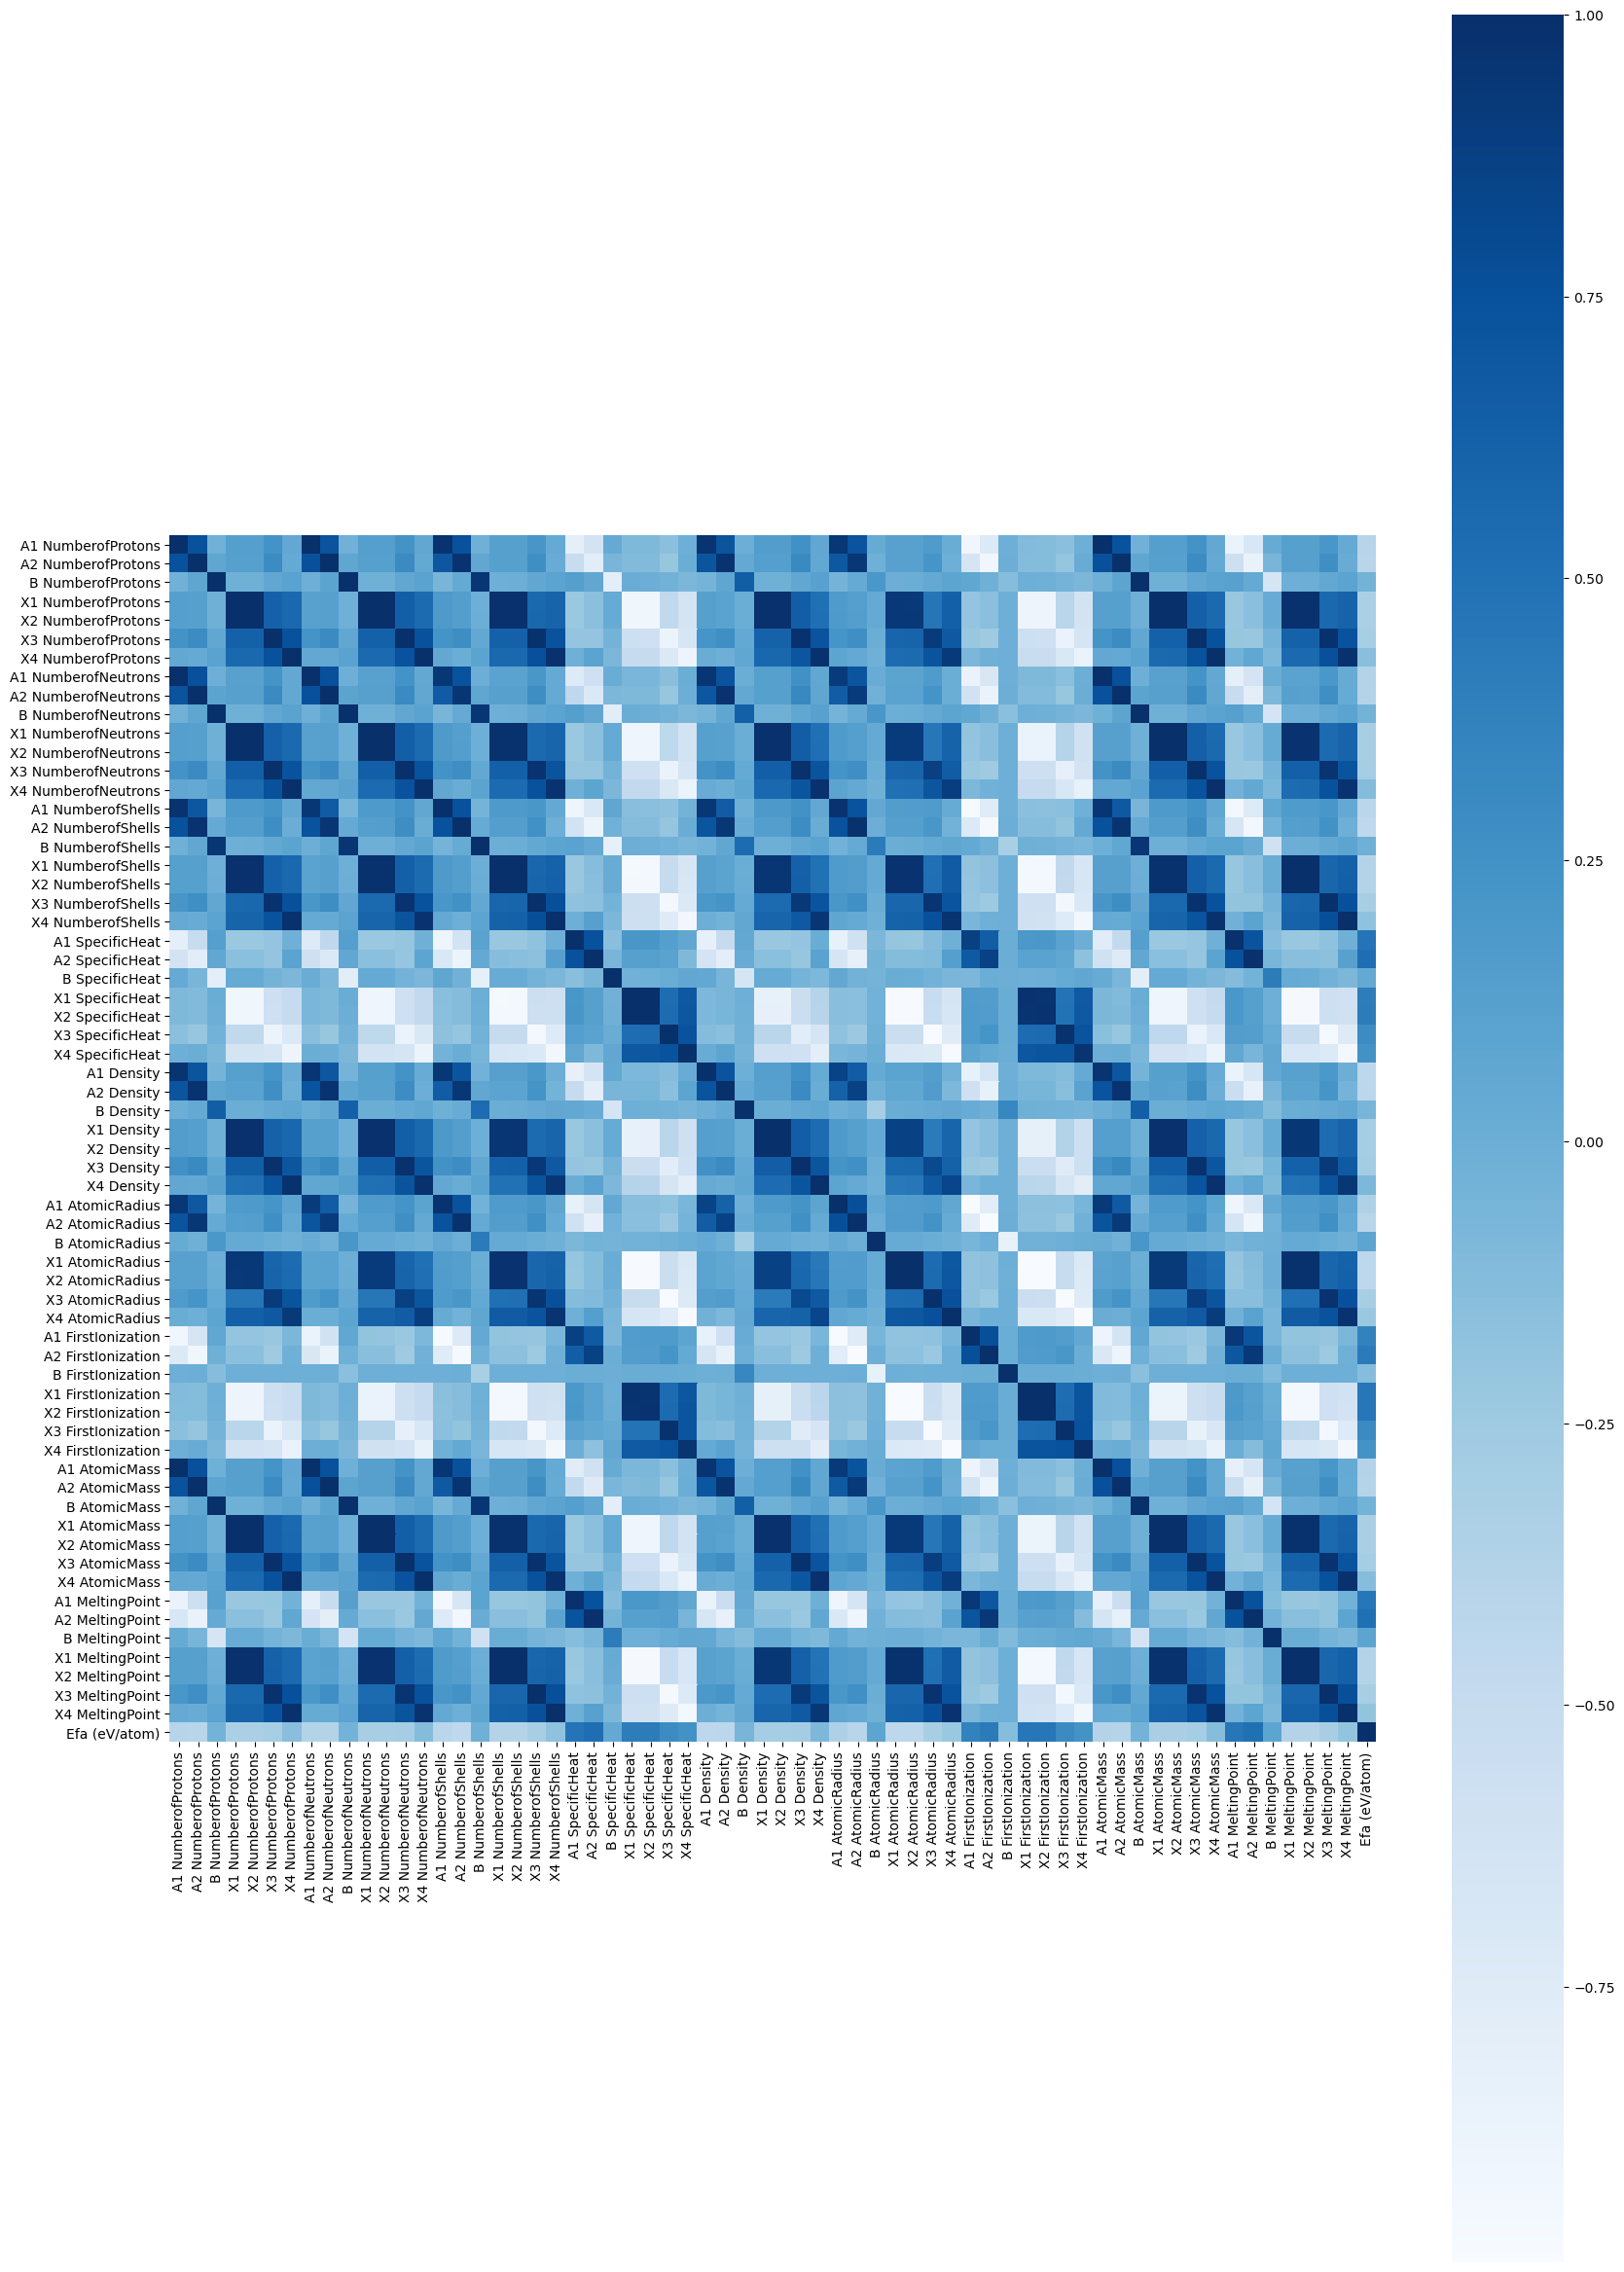

In [3]:
dataML.heatmap_before() #画特征选择之前的总eatmap热图

# 3. rfe特征选择

In [4]:
dataML.feature_rfe_select1(23)   #23为希望最后剩余的特征数目，可以自行改变

特征是否被选中：
 [False False  True False  True False False False  True False False False
 False False False  True False False  True False False False  True  True
 False  True False False  True  True  True False False False False False
 False False False  True False  True  True  True  True False  True False
  True False  True False False  True  True False False  True  True False
 False False False]
获取的数据特征尺寸: (305, 23)
最后的特征s_rfe: ['B NumberofProtons' 'X2 NumberofProtons' 'A2 NumberofNeutrons'
 'A2 NumberofShells' 'X2 NumberofShells' 'A2 SpecificHeat'
 'B SpecificHeat' 'X2 SpecificHeat' 'A1 Density' 'A2 Density' 'B Density'
 'X2 AtomicRadius' 'X4 AtomicRadius' 'A1 FirstIonization'
 'A2 FirstIonization' 'B FirstIonization' 'X2 FirstIonization'
 'X4 FirstIonization' 'A2 AtomicMass' 'X2 AtomicMass' 'X3 AtomicMass'
 'A2 MeltingPoint' 'B MeltingPoint']
目标target:      Efa (eV/atom)
0         0.817268
1         0.468555
2         0.457779
3         0.305243
4         0.080708
..             ...
300 

# 4 画rfe特征选择后的热图和pairplot图
## 4.1 画rfe特征选择后的热图

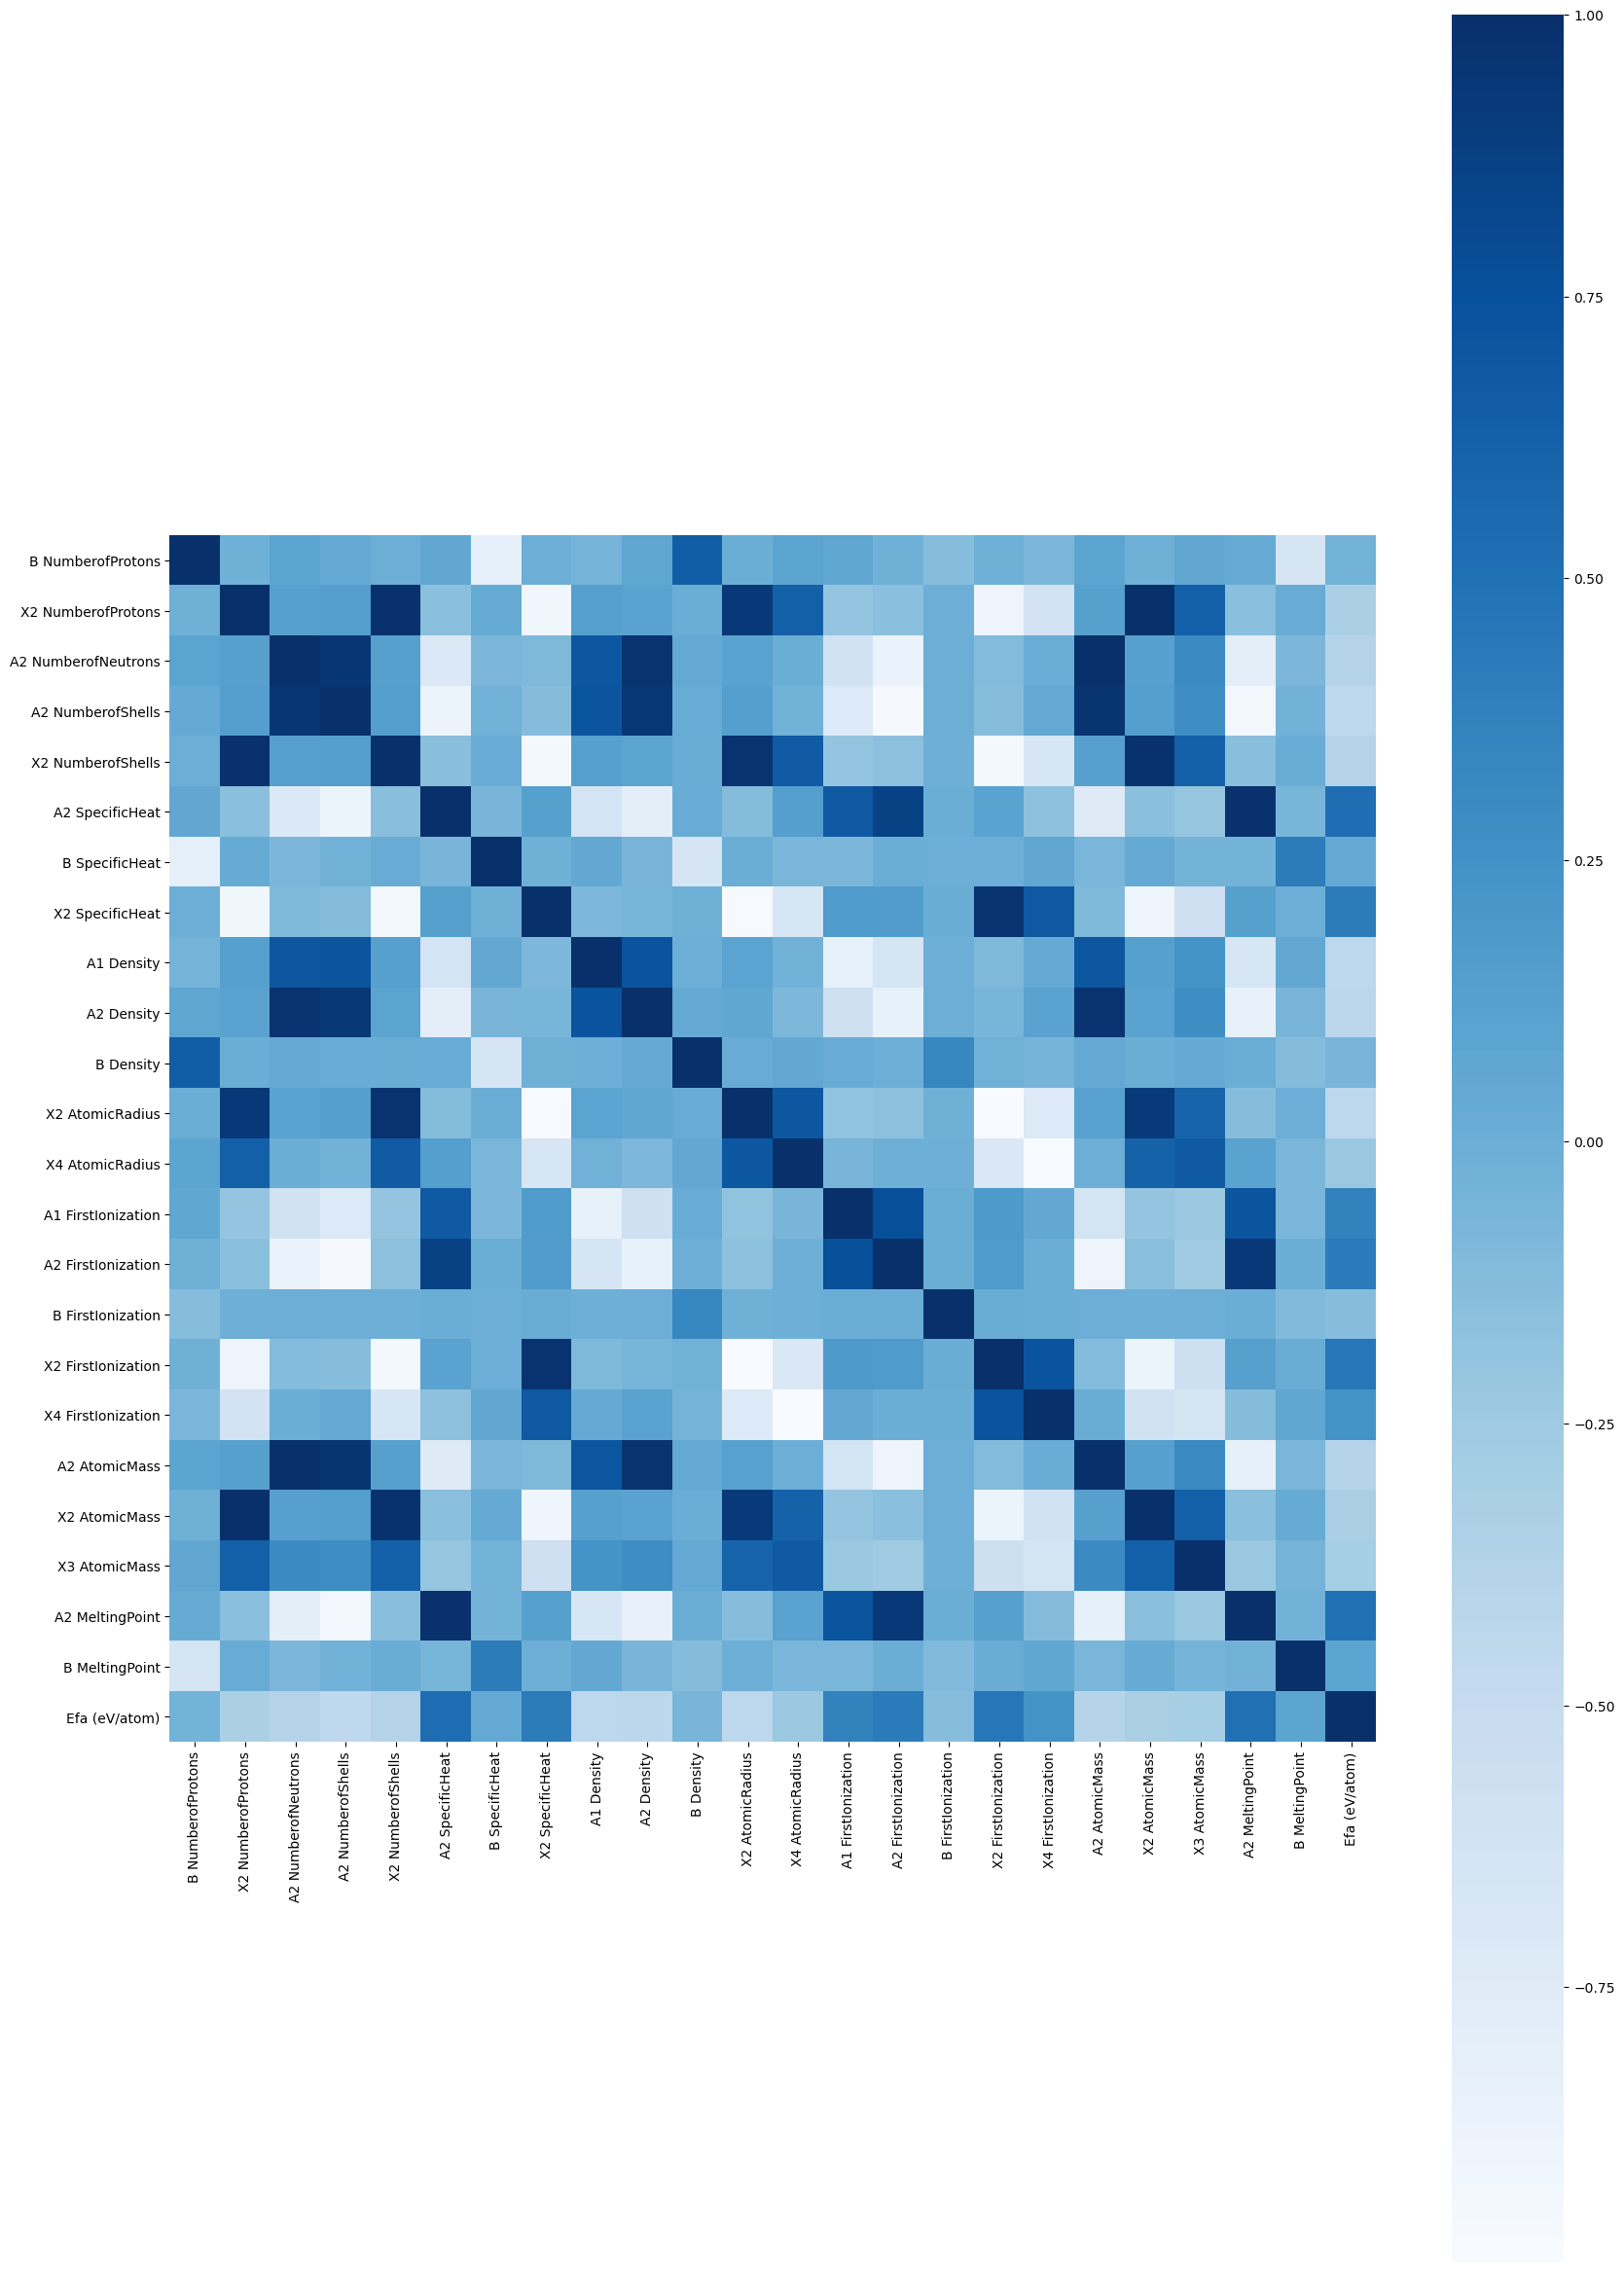

In [5]:
dataML.heatmap_afterRFE() 

In [ ]:
dataML.pairplot_afterRFE()#这里画图需要较长时间，请耐心

这个图可以提取科学信息

正相关还是负相关

# 5 重要性排名（皮尔逊系数）
## 5.1 特征选择之前所有特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
A1 SpecificHeat,0.475211
X2 FirstIonization,0.462445
A1 MeltingPoint,0.459693
...,...
A2 Density,-0.431418
X1 AtomicRadius,-0.436009
A1 Density,-0.437098
X2 AtomicRadius,-0.439406


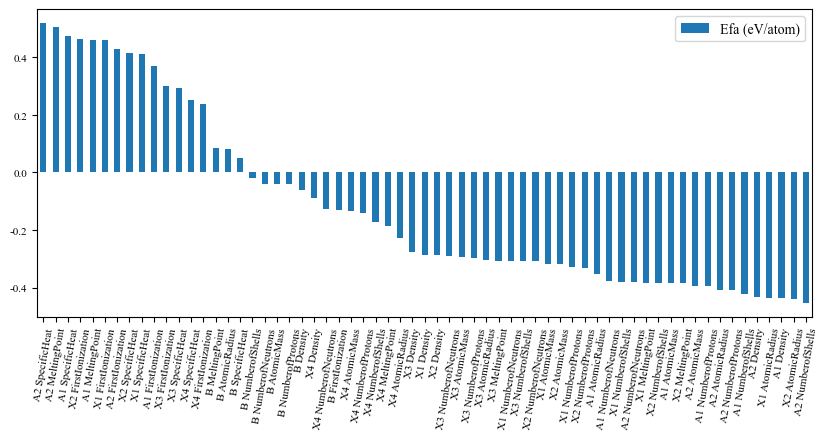

In [6]:
dataML.FeatureImportance_before(80,8,10,4)  #rotation=80, fontsize=8, figure_size_xaxis=10,figure_size_yaxis=4

这个图可以提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

## 5.2 特征选择之后的个别特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
X2 FirstIonization,0.462445
A2 FirstIonization,0.429791
X2 SpecificHeat,0.415926
A1 FirstIonization,0.369538
X4 FirstIonization,0.238356
B MeltingPoint,0.083589
B SpecificHeat,0.048594
B NumberofProtons,-0.041833


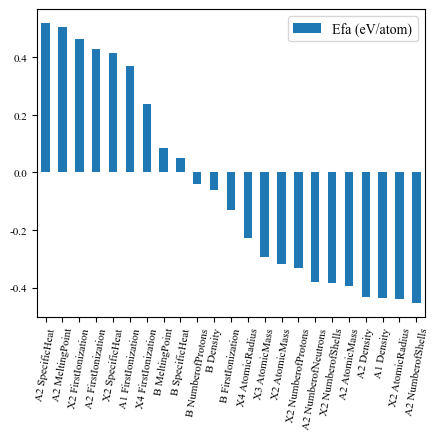

In [7]:
dataML.FeatureImportance_afterRFE(80,12,5,4) #rotation=80, fontsize=12, figure_size_xaxis=5,figure_size_yaxis=4

这个图可以快速提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

# 6 机器学习建模
## 6.1 xgboost建模和准确率画图
### 6.1.1 xgboost默认超参数建模画图
#### (n_estimators=2000, max_depth=100, eta=0.1, gamma=0,
#### subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

In [ ]:
dataML.xgboost_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.1.2 xgboost自己修改超参数, 建模
画图得到拟合图以及交叉验证图
(n_estimators=2000xxx, max_depth=100xxx, eta=0.1xxx, gamma=0xxx,
subsample=0.9xxx, colsample_bytree=0.9xxx, learning_rate=0.2xxx)

In [ ]:
dataML.xgboost_modify(2000,200,0.2,0,0.9,0.8,0.2) #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0, subsample=0.9, colsample_bytree=0.8, learning_rate=0.2)
#这里可以自己更改超参数，play with it, 观察准确率是否提升

第一个拟合图是基于测试集。
RMSE: 0.055163274701856106
MAE: 0.03133570165011043
R2: 0.8083609244543635
MSE: 0.0030429868758324375
上述为误差，相比于真实目标数值还行。
r2越大越好，这里也还行

第二个交叉验证图为10折交叉验证，准确率为不同k的准确率，大致看到大部分score接近1，平均score>0.8甚至>0.9, 因此10折交叉验证准确率还行。这里的score是R2。

### 6.1.3 xgboostRandomSearchCV随机超参数, 建模并观察准确率

In [ ]:
# dataML.xgboost_RandomSearchCV() 

#比较慢，尤其是交叉验证，请耐心等待
        #         "n_estimators": [100, 200, 300, 400, 500],
        #         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        #         'learning_rate': [0.01, 0.05, 0.1],
        #         'subsample': [0.6, 0.8, 1.0],
        #         'colsample_bytree': [0.6, 0.8, 1.0],
        #         'min_child_weight': [1, 5, 10],
        #         'gamma': [0.5, 1, 1.5, 2, 5],
        #         "objective": "multi:softmax",
        #         "aplha": [0, 2, 4, 6, 8]

### 6.1.4 xgboost SearchCV网格搜索（并非随机）寻找最优超参数, 建模并观察准确率

In [ ]:
# dataML.xgboost_GridSearchCV() #非常慢，请耐心等待


#  这里暂时设置的参数与RandomSearch一样，后面更能需要更新
#     param_distribs = {
#         'n_estimators': range(80, 200, 4),
#         'max_depth': range(2, 15, 1),
#         'learning_rate': np.linspace(0.01, 2, 20),
#         'subsample': np.linspace(0.7, 0.9, 20),
#         'colsample_bytree': np.linspace(0.5, 0.98, 10),
#         'min_child_weight': range(1, 9, 1)
#          n_iter=300

## 6.2 Random forest 随机森林建模画图
### 6.2.1 Random forest 默认超参数建模画图

In [ ]:
dataML.RandomForest_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合

### 6.2.2 Random forest 自己修改超参数建模画图

In [ ]:
dataML.RandomForest_modify(20, 0.3, 2, 10, 10) # max_depth=20, max_features=0.3, min_samples_split=2, n_estimators=10, random_state=10 可以自己修改

### 6.2.3 Random forest RandomSearchCV 随机搜索超参数建模画图
param_distribs = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [130, 180, 230]}
           
RandomizedSearchCV(clf, param_distribs, n_iter=300, cv=10, scoring='neg_mean_squared_error')

In [ ]:
# dataML.RandomForest_RandomSearchCV()  #需要很长时间

## 6.3  Bagging建模画图
### 6.3.1  Bagging 默认建模画图

In [ ]:
dataML.Bagging_default()

## 6.4  AdaBoost建模画图
### 6.4.1  AdaBoost默认建模画图

In [ ]:
dataML.AdaBoost_default()

## 6.5  GradientBoosting建模画图
### 6.5.1  GradientBoosting默认建模画图

In [ ]:
dataML.GradientBoosting_default()

## 6.6 ExtraTree建模画图
### 6.6.1 ExtraTree默认建模画图

In [ ]:
dataML.ExtraTree_default()

## 6.7 svm建模画图
### 6.7.1 svm默认建模画图

In [ ]:
dataML.svm_default()

## 6.8 DecisionTree建模画图
### 6.8.1 DecisionTree默认建模画图

In [ ]:
dataML.DecisionTree_default()

## 6.9 LinearRegression建模画图
### 6.9.1 LinearRegression默认建模画图

In [ ]:
dataML.LinearRegression_default()

In [ ]:
## 6.10 Ridge建模画图
### 6.10.1 Ridge默认建模画图

In [ ]:
dataML.Ridge_default()

## 6.11 MLP建模画图
### 6.11.1 MLP默认建模画图

In [ ]:
dataML.MLP_default()

### 6.11.2 MLP_modify手动修改超参数建模画图

In [ ]:
dataML.MLP_modify(0.01,0.0001,200000,200,200)
# #   MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01, alpha=0.0001, max_iter=200000, hidden_layer_sizes=(200, 200))

比较上述算法，选取最准确的机器学习模型

# 7. 简单的预测集建立

In [8]:
dataML.xgboost_modify_predict(1000,200,0.2,0,0.9,0.8,0.2,'x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# 目前只有 xgboost_modify

new features dataset:            0         1         2         3         4         5         6  \
0 -1.175328 -0.161108 -3.745942 -0.321212 -0.282200 -0.086935 -0.412472   
1 -0.881658 -0.065658 -0.235783 -1.771288  0.070207 -0.902117 -0.344625   
2  1.849925 -0.730325 -0.640299  1.007572 -0.052255 -0.013523 -1.390677   
3  0.649963  0.018096 -1.847483 -0.212325 -1.173959  0.016976 -0.789440   
4  0.060732 -1.871654  0.737515 -0.589024 -2.614177  0.435844  1.123998   

          7         8         9  ...        13        14        15        16  \
0 -0.048654 -1.245132 -1.364781  ...  1.668454  0.712043 -1.105737  1.044652   
1  0.240097 -1.136606 -0.520027  ... -0.864585 -1.832277  0.046192 -0.458767   
2  0.089617  1.437003 -0.350448  ...  0.176062 -0.796953 -1.513023 -0.894258   
3 -0.678659  0.216661  0.086193  ... -0.940643  1.332236  0.360422  0.648495   
4  1.030371 -1.785119  0.005520  ... -0.218939 -0.519476 -0.540805 -1.177905   

         17        18        19        20    

这里生成了新的预测数据集New_prediction_total.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

# 8 描述符导入 
## 8.1 有机分子描述符导入（NJmatML提供了pydel描述符和rdkit描述符）
### 8.1.1  pydel描述符

In [1]:
# 8.1.1.1 导入有机分子smiles码的csv文件
from NJmatML import dataML 
dataML.smiles_csv_pydel("Featurize_formula_exps.csv")

0                 Cc1ccccc1
1                 C=CCC=CCO
2            CC1=CC(Br)CCC1
3    C(C=CC1)=C(C=1C(=O)O)O
4                       CCC
Name: SMILES, dtype: object


In [2]:
# 8.1.1.2 pydel描述符生成
dataML.pydel_featurizer()

  nAcid                ALogP                ALogp2                 AMR  \
0     0   0.6420000000000001   0.41216400000000014              5.5021   
1     0   0.7890000000000001    0.6225210000000002  32.608000000000004   
2     0   1.2389999999999999    1.5351209999999997             37.2862   
3     1  0.40489999999999987    0.1639440099999999             38.5605   
4     0  -0.1853999999999998  0.034373159999999923              14.709   

                 apol naAromAtom nAromBond nAtom nHeavyAtom  nH  ...  \
0           17.654344          6         6    15          7   8  ...   
1  18.029929999999997          0         0    17          7  10  ...   
2  22.704722999999984          0         0    19          8  11  ...   
3  18.726757999999993          6         6    16         10   6  ...   
4  10.614344000000001          0         0    11          3   8  ...   

                  P1s                  P2s                 E1s  \
0  0.6459282616967016   0.3324692311280096  0.5506050917

### 8.1.2 rdkit描述符

In [3]:
# 8.1.2.1 导入有机分子smiles码的csv文件
dataML.smiles_csv_rdkit("Featurize_formula_exps.csv")

0                 Cc1ccccc1
1                 C=CCC=CCO
2            CC1=CC(Br)CCC1
3    C(C=CC1)=C(C=1C(=O)O)O
4                       CCC
Name: SMILES, dtype: object


In [4]:
# 8.1.2.2 rdkit描述符生成
dataML.rdkit_featurizer()

   BalabanJ     BertzCT      Chi0     Chi0n     Chi0v      Chi1     Chi1n  \
0  3.021465  129.965660  5.112884  4.386751  4.386751  3.393847  2.410684   
1  2.919498   64.580271  5.535534  4.300585  4.300585  3.414214  2.282554   
2  2.503881  104.954453  5.983128  5.153985  6.739982  3.787694  3.102028   
3  3.152941  254.783061  7.560478  5.112077  5.112077  4.715214  2.728688   
4  1.632993    0.000000  2.707107  2.707107  2.707107  1.414214  1.414214   

      Chi1v     Chi2n     Chi2v  ...  fr_sulfonamd  fr_sulfone  \
0  2.410684  1.654701  1.654701  ...             0           0   
1  2.282554  1.178356  1.178356  ...             0           0   
2  4.017704  2.421242  3.597388  ...             0           0   
3  2.728688  1.822302  1.822302  ...             0           0   
4  1.414214  0.707107  0.707107  ...             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             0            0            0  

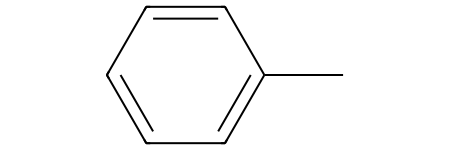

In [5]:
# 8.1.2.3 从smiles码画分子
dataML.drawMolecule('Cc1ccccc1') #括号里（SMILES码两边）请加引号

## 8.2 无机材料描述符 (NJmatML参考Matminer使用类独热编码方式特征化无机化学式)

In [6]:
# 8.2.1 导入含有无机材料化学式的csv
dataML.inorganic_csv("Inorganic_formula.csv")

        formula
0  (Fe2AgCu2)O3
1         Fe2O3
2        CsPbI3
3          MoS2
4      CuInGaSe
5            Si
6          TiO2


In [7]:
# 8.2.2 matminer无机材料（类独热编码）描述符生成，102维
# 例如(Fe2AgCu2)O3, Fe2O3, Cs3PbI3, MoS2, CuInGaSe, Si, TiO2等
dataML.inorganic_featurizer()

   index    0    1    2    3    4    5    6         7    8  ...   93   94  \
0      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.375000  0.0  ...  0.0  0.0   
1      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.600000  0.0  ...  0.0  0.0   
2      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
3      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
4      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
5      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0   
6      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.666667  0.0  ...  0.0  0.0   

    95   96   97   98   99  100  101  102  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[7 rows x 104 columns]
['H', '